In [1]:
import treys
#from treys_test import *
#import sys
#sys.path.insert(0, './treys_test')
#import treys
#import card as treys
#import evaluator as treys
#import deck as treys
#import lookup as treys
from itertools import product

import matplotlib.pyplot as plt

import numpy as np
from random import sample 
import random 

In [60]:
actions=["push","fold"]
suits = ["s", "h", "c", "d"]
ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "T", "J", "Q", "K", "A"]
rank_permutations=list(product(ranks, repeat=2))

# treys test

In [6]:
deck = treys.Deck()
board = deck.draw(5)
player1_hand = deck.draw(2)
player2_hand = deck.draw(2)

In [ ]:
deck = treys.Deck()

In [8]:
treys.Card.print_pretty_cards(board)

' [J♦],[2♦],[4♣],[5♥],[T♣] '

In [9]:
treys.Card.print_pretty_cards(player1_hand)


' [K♠],[Q♣] '

In [10]:
treys.Card.print_pretty_cards(player2_hand)


' [Q♦],[6♣] '

In [11]:
evaluator = treys.Evaluator()
p1_score = evaluator.evaluate(board, player1_hand)
p2_score = evaluator.evaluate(board, player2_hand)
if(p1_score<p2_score):
    print("player 1 win")
elif(p1_score>p2_score):
    print("player 2 win")
else:
    print("draw")

player 1 win


In [12]:
def simulate(board,player1_hand,player2_hand):
    evaluator = treys.Evaluator()
    p1_score = evaluator.evaluate(board, player1_hand)
    p2_score = evaluator.evaluate(board, player2_hand)
    if(p1_score<p2_score):
        return True
    elif(p1_score>p2_score):
        return False
    else:
        return True

# state2hand

In [61]:
from itertools import permutations
from itertools import combinations

def state2hand(state):
    rank_permutations[state][0]
    suits_rand=sample(suits,2)
    hand = [treys.Card.new(rank_permutations[state][0]+suits_rand[0]),treys.Card.new(rank_permutations[state][0]+suits_rand[1])]
    return hand

In [64]:
for i in range(10):
    hand=state2hand(168)
    print(treys.Card.print_pretty_cards(hand))

 [A♠],[A♣] 
 [A♦],[A♠] 
 [A♣],[A♥] 
 [A♣],[A♠] 
 [A♥],[A♣] 
 [A♠],[A♦] 
 [A♦],[A♠] 
 [A♠],[A♥] 
 [A♠],[A♦] 
 [A♦],[A♥] 


In [15]:
def get_ranks():

    ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "T", "J", "Q", "K", "A"]
    rank_permutations=product(ranks, repeat=2)
    return(rank_permutations)

In [16]:
test=get_ranks()
print(list(test))

[('2', '2'), ('2', '3'), ('2', '4'), ('2', '5'), ('2', '6'), ('2', '7'), ('2', '8'), ('2', '9'), ('2', 'T'), ('2', 'J'), ('2', 'Q'), ('2', 'K'), ('2', 'A'), ('3', '2'), ('3', '3'), ('3', '4'), ('3', '5'), ('3', '6'), ('3', '7'), ('3', '8'), ('3', '9'), ('3', 'T'), ('3', 'J'), ('3', 'Q'), ('3', 'K'), ('3', 'A'), ('4', '2'), ('4', '3'), ('4', '4'), ('4', '5'), ('4', '6'), ('4', '7'), ('4', '8'), ('4', '9'), ('4', 'T'), ('4', 'J'), ('4', 'Q'), ('4', 'K'), ('4', 'A'), ('5', '2'), ('5', '3'), ('5', '4'), ('5', '5'), ('5', '6'), ('5', '7'), ('5', '8'), ('5', '9'), ('5', 'T'), ('5', 'J'), ('5', 'Q'), ('5', 'K'), ('5', 'A'), ('6', '2'), ('6', '3'), ('6', '4'), ('6', '5'), ('6', '6'), ('6', '7'), ('6', '8'), ('6', '9'), ('6', 'T'), ('6', 'J'), ('6', 'Q'), ('6', 'K'), ('6', 'A'), ('7', '2'), ('7', '3'), ('7', '4'), ('7', '5'), ('7', '6'), ('7', '7'), ('7', '8'), ('7', '9'), ('7', 'T'), ('7', 'J'), ('7', 'Q'), ('7', 'K'), ('7', 'A'), ('8', '2'), ('8', '3'), ('8', '4'), ('8', '5'), ('8', '6'), ('8

# algorithm

In [65]:
#-------------------
#mettre ton code ici
learning_rate=0.1
reward=0
reward_stat=[]
state_number=169

qtable=np.zeros((state_number,2))
qtable_rand=np.zeros((state_number,2))
#-------------------

169


In [66]:
for i in range(100):#epoch number
    state_index=0
    for state in qtable:
        
        #-------------------
        #mettre ton code ici
        player1_hand=state2hand(state_index) 
        #-------------------

        #gen player2 and board cards
        deck = treys.Deck()
        deck.cards.remove(player1_hand[0])
        deck.cards.remove(player1_hand[1])
        board = deck.draw(5)
        player2_hand = deck.draw(2)
        
        #check who wins
        player1_win=simulate(board,player1_hand,player2_hand) #take long long long tiiiiiiiime
        
        #choose a random action
        action=random.choice(actions)
        
        #rewarding system
        if(action=="push"):
            if(player1_win):
                reward=1
            else:
                reward=-1
            qtable[state_index][0]=(1-learning_rate)*state_index+learning_rate*reward
        else:
            if(player1_win):
                reward=-1
            else:
                reward=1
            qtable[state_index][1]=(1-learning_rate)*state_index+learning_rate*reward
        state_index+=1
    print(i+1)
print("finish")


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
finish


In [81]:
def training(epoch_number,qtable):
    for i in range(epoch_number):#epoch number
        state_index=0
        for state in qtable:

            #-------------------
            #mettre ton code ici
            player1_hand=state2hand(state_index) 
            #-------------------

            #gen player2 and board cards
            deck = treys.Deck()
            deck.cards.remove(player1_hand[0])
            deck.cards.remove(player1_hand[1])
            board = deck.draw(5)
            player2_hand = deck.draw(2)

            #check who wins
            player1_win=simulate(board,player1_hand,player2_hand) #take long long long tiiiiiiiime

            #choose a random action
            action=random.choice(actions)

            #rewarding system
            if(action=="push"):
                if(player1_win):
                    reward=1
                else:
                    reward=-1
                qtable[state_index][0]=(1-learning_rate)*state_index+learning_rate*reward
            else:
                if(player1_win):
                    reward=-1
                else:
                    reward=1
                qtable[state_index][1]=(1-learning_rate)*state_index+learning_rate*reward
            state_index+=1
    return qtable

In [32]:
def average(lst): 
    return sum(lst) / len(lst) 

In [69]:
def test(epoch_number,qtable):
    reward_stat=[]
    state_number=169

    for i in range(epoch_number):#epoch number
        state_index=random.randint(0,168)
        #-------------------
        #mettre ton code ici
        player1_hand=state2hand(state_index) 
        #-------------------

        #gen player2 and board cards
        deck = treys.Deck()
        deck.cards.remove(player1_hand[0])
        deck.cards.remove(player1_hand[1])
        board = deck.draw(5)
        player2_hand = deck.draw(2)

        #check who wins
        player1_win=simulate(board,player1_hand,player2_hand)

        #choose the best action
        if(qtable[state_index][0]>qtable[state_index][1]):
            action=actions[0]
        elif(qtable[state_index][0]>qtable[state_index][1]):
            action=actions[1]
        else:
            action=random.choice(actions)


        #rewarding system
        if(action=="push"):
            if(player1_win):
                reward_stat.append(1)
            else:
                reward_stat.append(-1)
        else:
            if(player1_win):
                reward_stat.append(-1)
            else:
                reward_stat.append(1)
    #plt.plot(reward_stat)
    #plt.show()
    return average(reward_stat)

In [75]:
print(test(1000,qtable))
print(test(1000,qtable_rand))

0.262
0.014


In [84]:
#-------------------
#mettre ton code ici
learning_rate=0.1
reward=0
reward_stat=[]
state_number=169

qtable_train=np.zeros((state_number,2))
#-------------------

In [85]:
reward_stat=[]
reward_stat.append(test(1000,qtable_train))
for i in range(10):
    qtable_train=training(10,qtable_train)
    reward_stat.append(test(1000,qtable_train))
    print(i)

0
1
2
3
4
5
6
7
8
9


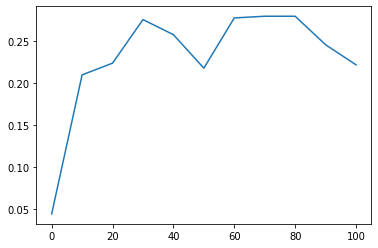

In [86]:
plt.plot([0,10, 20, 30, 40,50,60,70,80,90,100],reward_stat)

In [ ]:
deck = treys.Deck()
print(deck)
deck.cards.pop(0)
print(deck)

for i in range(0):
    print(i)
    boiard = deck.draw(5)